# Regularized Regression

| Situation                                             | Use Regularization? | Why                                               |
| ----------------------------------------------------- | ------------------- | ------------------------------------------------- |
| Many correlated features                              | ✅ Yes               | Reduces overfitting and stabilizes coefficients   |
| Small sample size                                     | ✅ Yes               | Prevents overfitting to noise                     |
| Very high accuracy on train but poor test performance | ✅ Yes               | Regularization can improve generalization         |
| Few features, clear signal                            | ❌ Maybe not         | Regularization may be unnecessary or even harmful |


| Term               | Meaning                                                             |
| ------------------ | ------------------------------------------------------------------- |
| **Regularization** | Penalizes model complexity to avoid overfitting                     |
| **Ridge (L2)**     | Shrinks all coefficients, keeps all features                        |
| **Lasso (L1)**     | Shrinks some coefficients to zero, performs feature selection       |
| **α (alpha)**      | Controls the strength of the penalty (higher = more regularization) |


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'DejaVu Sans'


from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset (regression task)
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Train models
models = {
    "Linear": LinearRegression(),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1)
}

In [5]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R2 Score": r2})

In [6]:
# Results summary
df_results = pd.DataFrame(results)
print(df_results)

               Model       MSE  R2 Score
0             Linear  0.541129  0.591051
1  Ridge (alpha=1.0)  0.541047  0.591113
2  Lasso (alpha=0.1)  0.603165  0.544168


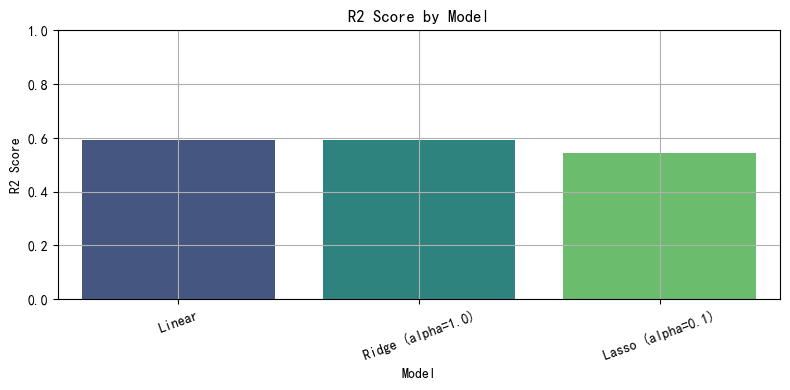

In [8]:
# Visualize model performance
plt.figure(figsize=(8, 4))
sns.barplot(data=df_results, x="Model", y="R2 Score", palette="viridis")
plt.title("R2 Score by Model")
plt.ylim(0, 1)
plt.ylabel("R2 Score")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# View coefficient shrinkage
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": models["Linear"].coef_,
    "Ridge": models["Ridge (alpha=1.0)"].coef_,
    "Lasso": models["Lasso (alpha=0.1)"].coef_,
})


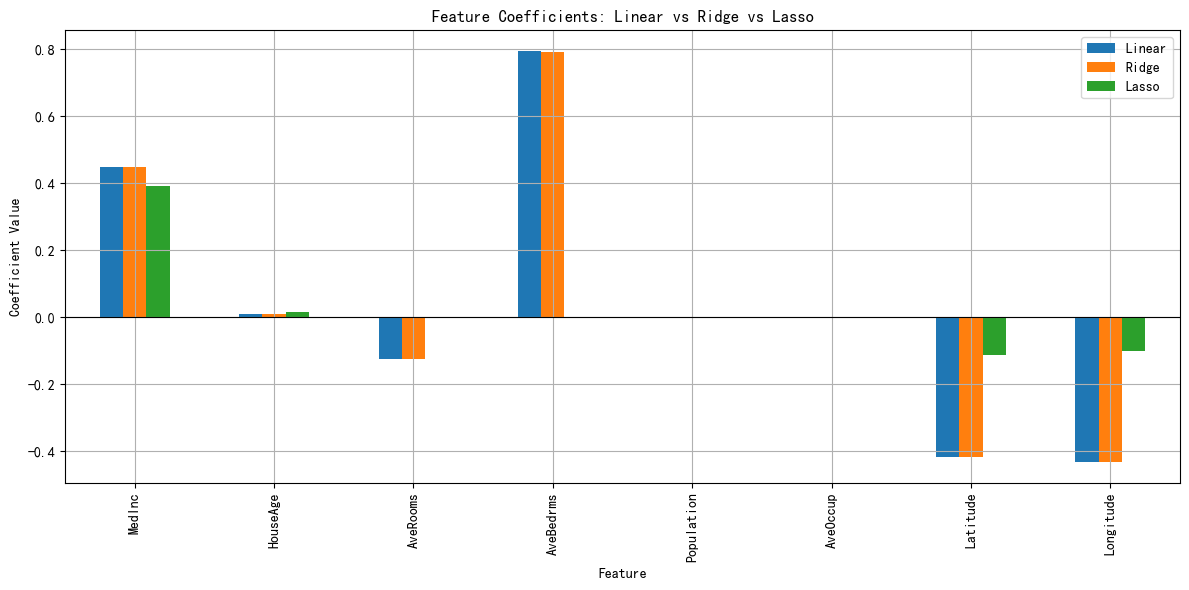

In [10]:
coef_df.set_index("Feature").plot(kind="bar", figsize=(12, 6))
plt.title("Feature Coefficients: Linear vs Ridge vs Lasso")
plt.ylabel("Coefficient Value")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.tight_layout()
plt.show()

| Feature                   | Interpretation                                                        |
| ------------------------- | --------------------------------------------------------------------- |
| `MedInc`                  | All models agree it's the **strongest positive predictor**            |
| `Latitude` / `Longitude`  | Strong negative impact (likely reflects geography: coastal vs inland) |
| `Population` & `AveOccup` | Lasso sets them to 0 → considered **not useful**                      |
| `AveRooms` & `AveBedrms`  | Moderate influence, slightly adjusted by Ridge/Lasso                  |


| Model      | What it did                                                    |
| ---------- | -------------------------------------------------------------- |
| **Linear** | No regularization → full coefficients, risk of overfitting     |
| **Ridge**  | Shrinks coefficients to reduce overfitting, keeps all features |
| **Lasso**  | Shrinks **and eliminates** some coefficients for sparsity      |


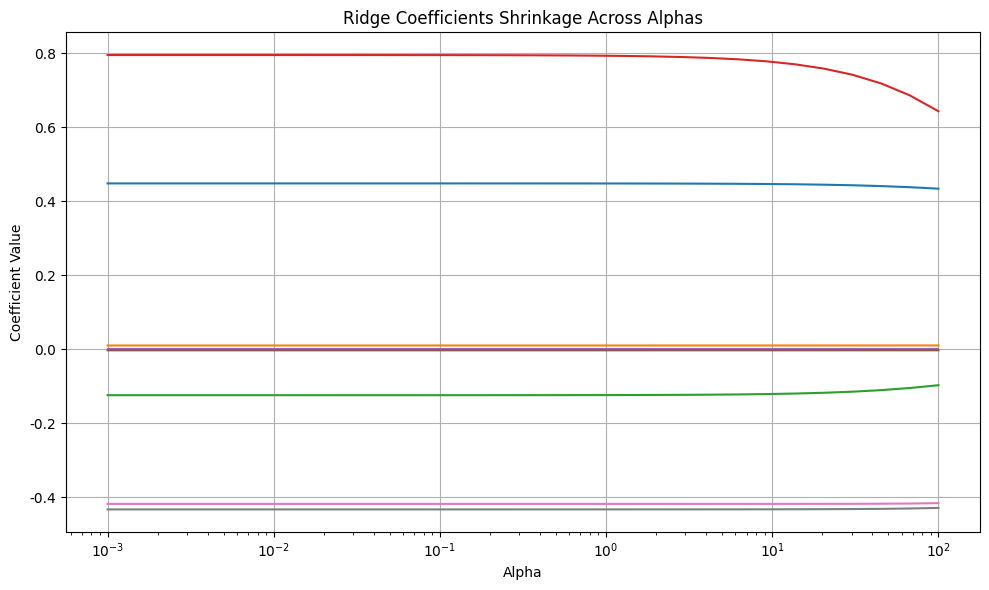

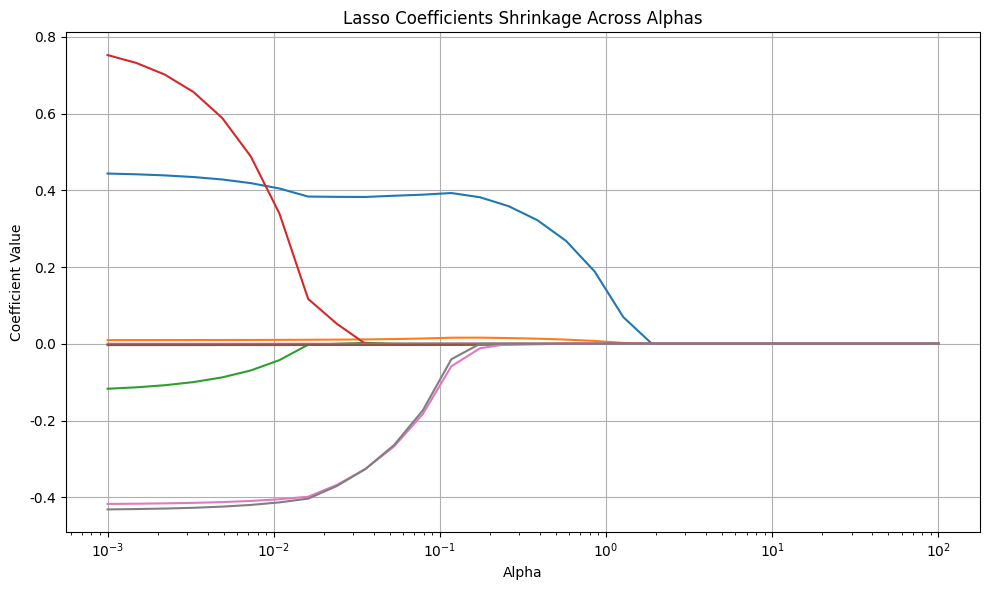

In [ ]:
# Visualize weight shrinkage across alpha values for Ridge and Lasso
alphas = np.logspace(-3, 2, 30)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title("Ridge Coefficients Shrinkage Across Alphas")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title("Lasso Coefficients Shrinkage Across Alphas")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")

plt.grid(True)
plt.tight_layout()
plt.show()


- Ridge regression (L2) penalizes large coefficients and shrinks them, but never eliminates them entirely.
- It keeps all features but reduces their influence.
- Good for multicollinearity (correlated features) and when you want to retain all features.



- Lasso regression (L1) not only shrinks coefficients but also performs feature selection by setting some to exactly zero.
- As alpha increases:
    - First, small/unimportant features get dropped.
    - Eventually, only the strongest predictors remain.
- Great when you suspect only a few features really matter.

|                       | Ridge (L2)                                | Lasso (L1)                               |
| --------------------- | ----------------------------------------- | ---------------------------------------- |
| Coefficient shrinkage | Gradual, never zero                       | Sharp — some become **exactly zero**     |
| Feature selection     | ❌ No                                      | ✅ Yes                                    |
| Best for              | Keeping all features but reducing overfit | Sparse models, automatic feature pruning |
| Behavior as α ↑       | Coefficients shrink, remain non-zero      | Coefficients shrink to zero (many)       |
